In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

In [148]:
ingredients_df = pd.read_excel(r"C:\Users\Dell\Desktop\Pizza_ingredients.xlsx") # Load your dataset
ingredients_df

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0
...,...,...,...,...
513,veggie_veg_s,The Vegetables + Vegetables Pizza,Green Peppers,20.0
514,veggie_veg_s,The Vegetables + Vegetables Pizza,Red Onions,20.0
515,veggie_veg_s,The Vegetables + Vegetables Pizza,Zucchini,10.0
516,veggie_veg_s,The Vegetables + Vegetables Pizza,Spinach,15.0


In [205]:
df = pd.read_excel(r"C:\Users\Dell\Desktop\Pizza_Sale.xlsx")
df

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01 00:00:00,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01 00:00:00,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01 00:00:00,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01 00:00:00,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01 00:00:00,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [206]:
# Convert 'order_date' to datetime, handling mixed formats
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce', dayfirst=True)

In [207]:
# Drop rows where 'order_date' conversion failed (NaT values)
df = df.dropna(subset=['order_date'])

In [17]:
# Initial Inspection of the Data

# Display first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(df.head())


First few rows of the dataset:
   pizza_id  order_id  pizza_name_id  quantity           order_date  \
0         1         1     hawaiian_m         1  2015-01-01 00:00:00   
1         2         2  classic_dlx_m         1  2015-01-01 00:00:00   
2         3         2  five_cheese_l         1  2015-01-01 00:00:00   
3         4         2    ital_supr_l         1  2015-01-01 00:00:00   
4         5         2     mexicana_m         1  2015-01-01 00:00:00   

  order_time  unit_price  total_price pizza_size pizza_category  \
0   11:38:36       13.25        13.25          M        Classic   
1   11:57:40       16.00        16.00          M        Classic   
2   11:57:40       18.50        18.50          L         Veggie   
3   11:57:40       20.75        20.75          L        Supreme   
4   11:57:40       16.00        16.00          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, R

In [208]:
# Drop rows with missing values (if any)
df.dropna(inplace=True)
ingredients_df.dropna(inplace=True)

In [211]:
# Handle outliers by capping extreme values in quantity (e.g., 99th percentile)
q99 = df['quantity'].quantile(0.99)
df['quantity'] = np.where(df['quantity'] > q99, q99, df['quantity'])

In [212]:
# Feature Engineering
# Extract day, month, and year from order_date
df['day_of_week'] = df['order_date'].dt.day_name()
df['month'] = df['order_date'].dt.month
df['year'] = df['order_date'].dt.year

In [213]:
# Ensure there are no duplicate 'order_date' values by aggregating
df = df.groupby('order_date').agg({'quantity': 'sum'}).reset_index()

In [214]:
# Set 'order_date' as the index for time series analysis
df.set_index('order_date', inplace=True)

In [216]:
# Ensure the data has a daily frequency (fill missing dates)
df = df.asfreq('D')

In [217]:
# Fill missing values (if any) by forward filling
#df['quantity'].fillna(method='ffill', inplace=True)
df['quantity'] = df['quantity'].ffill()

In [219]:
# Aggregate sales data for daily, weekly, and monthly trends
daily_sales = df.reset_index()
weekly_sales = df['quantity'].resample('W').sum().reset_index()
monthly_sales = df['quantity'].resample('M').sum().reset_index()

C:\Users\Dell\AppData\Local\Temp\ipykernel_11680\3170979868.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['quantity'].resample('M').sum().reset_index()


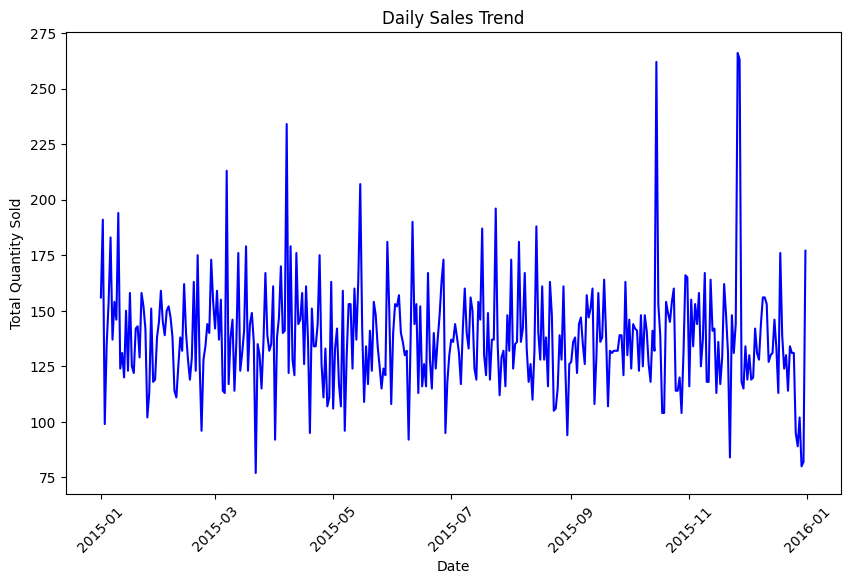

In [220]:
# Plot Daily Sales Trend
plt.figure(figsize=(10,6))
plt.plot(daily_sales['order_date'], daily_sales['quantity'], color='blue')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

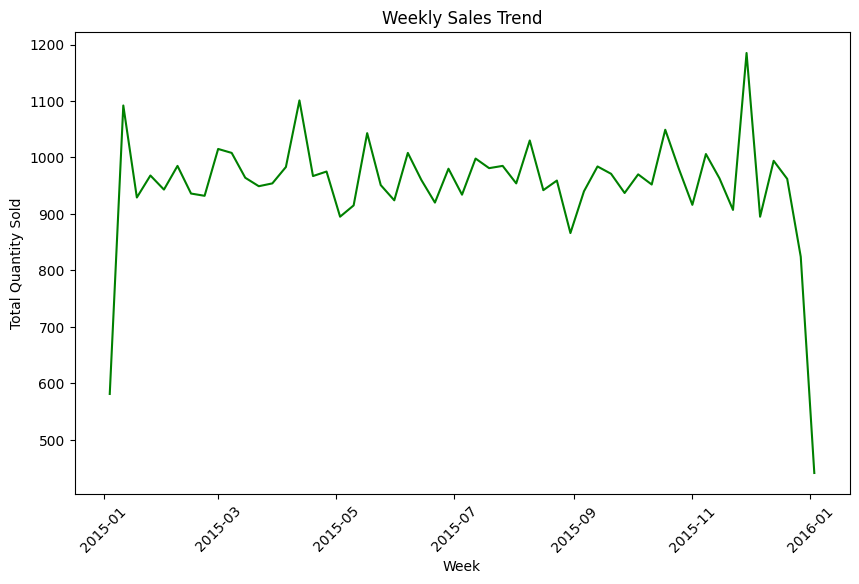

In [221]:
# Plot Weekly Sales Trend
plt.figure(figsize=(10,6))
plt.plot(weekly_sales['order_date'], weekly_sales['quantity'], color='green')
plt.title('Weekly Sales Trend')
plt.xlabel('Week')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

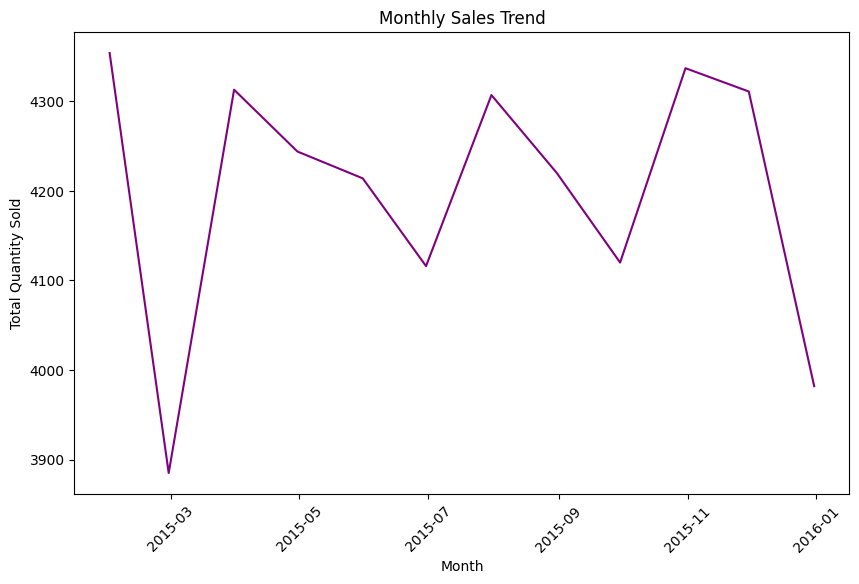

In [222]:
# Plot Monthly Sales Trend
plt.figure(figsize=(10,6))
plt.plot(monthly_sales['order_date'], monthly_sales['quantity'], color='purple')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

ARIMA Model and Forecasting

In [224]:
# Split data into training and testing sets (use last 30 days for testing)
train_data = df['quantity'][:-30]
test_data = df['quantity'][-30:]

In [227]:
# Fit ARIMA model
arima_model = ARIMA(train_data, order=(5,1,0))  # ARIMA(5,1,0) as an example
arima_fit = arima_model.fit()

In [228]:
# Forecast next 30 days
forecast = arima_fit.forecast(steps=30)
forecast_index = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')

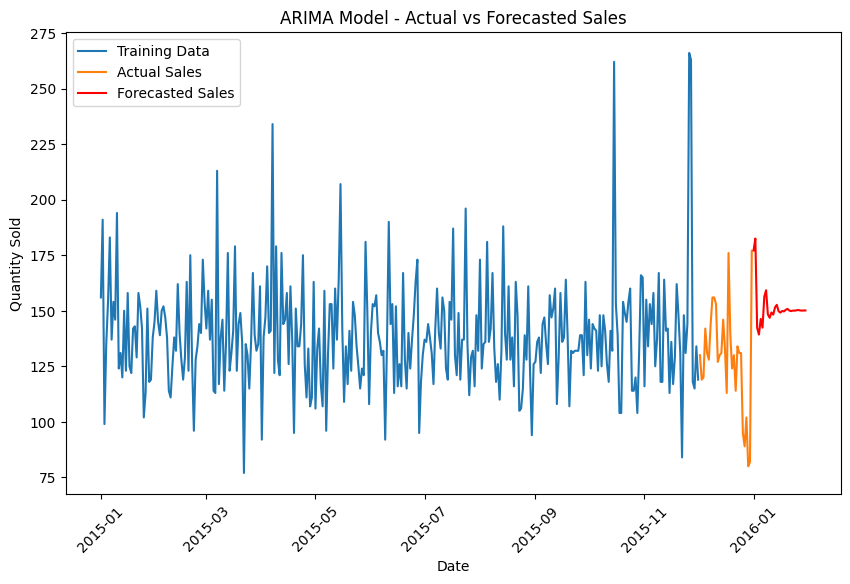

In [229]:
# Plot actual vs predicted sales
plt.figure(figsize=(10,6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Sales')
plt.plot(forecast_index, forecast, label='Forecasted Sales', color='red')
plt.title('ARIMA Model - Actual vs Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [230]:
# Calculate MAPE
mape = mean_absolute_percentage_error(test_data, forecast)
print(f'MAPE: {mape:.2f}')

MAPE: 0.25


In [231]:
# Calculate MAPE
mape = mean_absolute_percentage_error(test_data, forecast) * 100  # Convert to percentage


In [232]:
# Print MAPE result
print(f'Mean Absolute Percentage Error (MAPE) on test data: {mape:.2f}%')
print("---------------------------------------------------------------------")


Mean Absolute Percentage Error (MAPE) on test data: 24.72%
---------------------------------------------------------------------


In [233]:
# Calculate Ingredient Purchase Order

# Total pizzas predicted for the next week (7 days from the forecast)
total_pizzas_predicted = forecast[:7].sum()

In [234]:
# Create 'quantity_per_pizza' if it doesn't exist
if 'quantity_per_pizza' not in ingredients_df.columns:
    ingredients_df['quantity_per_pizza'] = np.random.uniform(0.1, 1.0, size=len(ingredients_df))  # Random values; adjust as needed

In [235]:
# Calculate the required quantities of each ingredient based on the predicted sales
ingredients_df['total_quantity_needed'] = ingredients_df['quantity_per_pizza'] * total_pizzas_predicted

In [236]:
# Group by pizza_ingredients and sum total_quantity_needed to remove duplicates
ingredients_df = ingredients_df.groupby('pizza_ingredients', as_index=False).agg({'total_quantity_needed': 'sum'})

In [237]:
# Sort ingredients by total quantity needed in descending order
ingredients_df = ingredients_df.sort_values('total_quantity_needed', ascending=False)

In [238]:
# Save the complete purchase order to CSV
ingredients_df[['pizza_ingredients', 'total_quantity_needed']].to_csv('complete_purchase_order_next_week.csv', index=False)


In [241]:
# Print out the total purchase order for all ingredients
print("Total Purchase Order for the Next Week (All Ingredients):")
print(ingredients_df[['pizza_ingredients', 'total_quantity_needed']])

Total Purchase Order for the Next Week (All Ingredients):
      pizza_ingredients  total_quantity_needed
56  Smoked Gouda Cheese            1061.262950
40             Pancetta            1035.561695
38               Onions            1023.558813
20                 Corn             964.800106
32      Italian Sausage             960.116416
..                  ...                    ...
61                Thyme             268.457097
47        Plum Tomatoes             243.166682
59   Sun-dried Tomatoes             222.367118
54        Romano Cheese             173.093744
39              Oregano             110.638216

[64 rows x 2 columns]


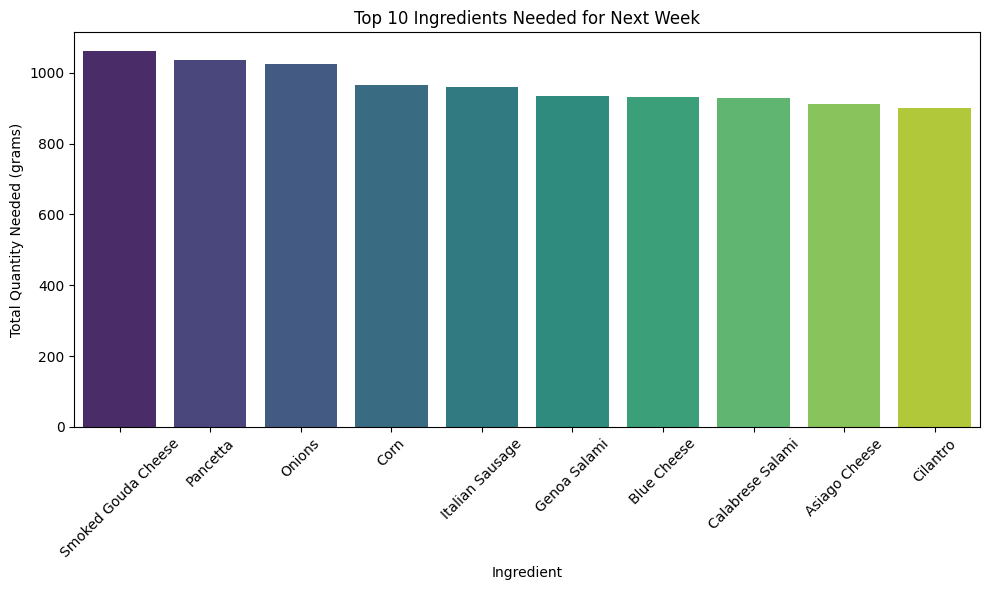

In [242]:
# Plot the top 10 ingredients needed
top_10_ingredients = ingredients_df.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_ingredients, x='pizza_ingredients', y='total_quantity_needed', palette='viridis',hue='pizza_ingredients', dodge=False)
plt.title('Top 10 Ingredients Needed for Next Week')
plt.xlabel('Ingredient')
plt.ylabel('Total Quantity Needed (grams)')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts layout to prevent overlap
plt.show()

In [243]:
# Save the top 10 purchase order to CSV
top_10_ingredients[['pizza_ingredients', 'total_quantity_needed']].to_csv('purchase_order_top_10_next_week.csv', index=False)

In [225]:
# Check the basic information of the dataset
print("\nBasic Information:")
print(df.info())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Freq: D
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   quantity  365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB
None


In [226]:
# Check the basic information of the dataset
print("\nBasic Information:")
print(df.info())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Freq: D
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   quantity  365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB
None


In [21]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64


In [22]:
# Display summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
            pizza_id      order_id pizza_name_id      quantity  order_date  \
count   48620.000000  48620.000000         48604  48620.000000       48620   
unique           NaN           NaN            91           NaN         358   
top              NaN           NaN    big_meat_s           NaN  26-11-2015   
freq             NaN           NaN          1811           NaN         261   
mean    24310.500000  10701.479761           NaN      1.019622         NaN   
std     14035.529381   6180.119770           NaN      0.143077         NaN   
min         1.000000      1.000000           NaN      1.000000         NaN   
25%     12155.750000   5337.000000           NaN      1.000000         NaN   
50%     24310.500000  10682.500000           NaN      1.000000         NaN   
75%     36465.250000  16100.000000           NaN      1.000000         NaN   
max     48620.000000  21350.000000           NaN      4.000000         NaN   

       order_time    unit_price   total_pr

Column-Wise Analysis (Distributions with Explanations)

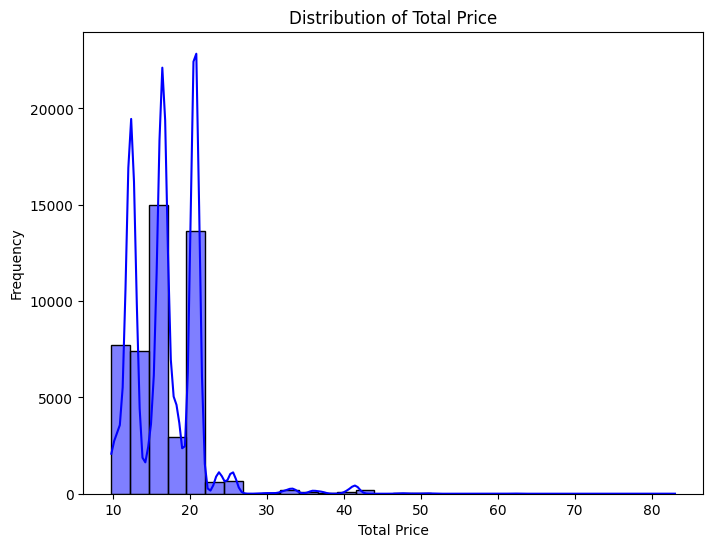

In [26]:
import seaborn as sns
# 1. Distribution of Total Price
plt.figure(figsize=(8, 6))
sns.histplot(df['total_price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Total Price')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.show()

In [27]:
# Verbal explanation
print("\nDistribution analysis for 'total_price':")
print(f" - Mean: {df['total_price'].mean()}")
print(f" - Median: {df['total_price'].median()}")
print(f" - The distribution {'has a skew' if abs(df['total_price'].skew()) > 0.5 else 'is fairly normal'}. Skewness: {df['total_price'].skew()}.")


Distribution analysis for 'total_price':
 - Mean: 16.821494250509122
 - Median: 16.5
 - The distribution has a skew. Skewness: 1.7330090941245695.


In [31]:
# Verbal explanation
print("\nDistribution analysis for 'pizza_category':")
print(f" - There are {df['pizza_category'].nunique()} unique categories of pizza.")
print(f" - The most common pizza category is '{df['pizza_category'].mode()[0]}' with {df['pizza_category'].value_counts().iloc[0]} orders.")


Distribution analysis for 'pizza_category':
 - There are 4 unique categories of pizza.
 - The most common pizza category is 'Classic' with 14572 orders.


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [54]:
# 2. Fill missing values
missing_before = df.isnull().sum()
print("Missing values before filling:\n", missing_before)

Missing values before filling:
 pizza_ingredients               0
Total_Ingredient_Requirement    0
dtype: int64


In [55]:
# List of columns with missing values
columns_with_missing_values = ['pizza_name_id', 'total_price', 'pizza_category', 'pizza_ingredients', 'pizza_name']

In [59]:
def fill_missing_values(df, column_to_fill, reference_columns):
    for idx, row in df[df[column_to_fill].isnull()].iterrows():
        ref_values = row[reference_columns]
        matching_row = df[(df[reference_columns] == ref_values).all(axis=1) & df[column_to_fill].notnull()]
        if not matching_row.empty:
            data.at[idx, column_to_fill] = matching_row[column_to_fill].values[0]           

In [61]:
# 3. Convert 'order_date' and 'order_time' to consistent datetime format
def parse_date(date_str):
    for fmt in ('%d-%m-%Y', '%d/%m/%Y'):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.NaT

In [68]:
import pandas as pd

# Step 1: Read the existing CSV file
# Replace 'path_to_existing_csv.csv' with the path to your existing CSV file
df = pd.read_csv(r'C:\Users\Dell\Downloads\dominos_final_purchase_order.csv')

In [79]:
# Step 2: Specify the columns you want to include in the new CSV file
columns_to_include = ['quantity', 'pizza_name_id','order_datetime']  # Example columns

In [83]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ------ --------------------------------- 1.6/9.8 MB 9.4 MB/s eta 0:00:01
   ----------------- ---------------------- 4.2/9.8 MB 11.5 MB/s eta 0:00:01
   --------------------------- ------------ 6.8/9.8 MB 11.7 MB/s eta 0:00:01
   -------------------------------------- - 9.4/9.8 MB 12.0 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 11.1 MB/s eta 0:00:00


In [85]:
!pip install pmdarima

   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------------------------------- 625.1/625.1 kB 5.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --------------------------------- ------ 2.4/2.8 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 9.5 MB/s eta 0:00:00


In [104]:
!pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---- ----------------------------------- 1.6/13.3 MB 7.7 MB/s eta 0:00:02
   --------- ------------------------------ 3.1/13.3 MB 8.0 MB/s eta 0:00:02
   --------------- ------------------------ 5.2/13.3 MB 8.6 MB/s eta 0:00:01
   ---------------------- ----------------- 7.6/13.3 MB 9.0 MB/s eta 0:00:01
   ----------------------------- ---------- 9.7/13.3 MB 9.2 MB/s eta 0:00:01
   ---------------------------------- ----- 11.5/13.3 MB 9.1 MB/s eta 0:00:01
   ---------------------------------------  13.1/13.3 MB 9.1 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 8.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 1.1/1.1 MB 7.8 MB/s eta 0:00:00


In [93]:
# Load dataset
df = pd.read_csv(r"C:\Users\Dell\Downloads\dominos_final_purchase_order.csv")
df               

,pizza_ingredients,Total_Ingredient_Requirement
0,?duja Salami,1020.0
1,Alfredo Sauce,235.0
2,Anchovies,750.0
3,Artichokes,2095.0
4,Arugula,290.0
...,...,...
57,Sun-dried Tomatoes,340.0
58,Thai Sweet Chilli Sauce,1160.0
59,Thyme,55.0
60,Tomatoes,10300.0


In [97]:
df = pd.read_excel(r"C:\Users\Dell\Desktop\Pizza_Sale.xlsx")
df

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01 00:00:00,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01 00:00:00,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01 00:00:00,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01 00:00:00,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01 00:00:00,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [111]:
# Convert 'order_date' to datetime, handling mixed formats
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce', dayfirst=True)

In [113]:
# Drop rows where 'order_date' conversion failed (NaT values)
df = df.dropna(subset=['order_date'])

In [114]:
# Drop rows with missing values (if any)
df.dropna(inplace=True)

In [116]:
# Handle outliers by capping extreme values in quantity (e.g., 99th percentile)
q99 = df['quantity'].quantile(0.99)
df['quantity'] = np.where(df['quantity'] > q99, q99, df['quantity'])

In [117]:
# Feature Engineering
df['day_of_week'] = df['order_date'].dt.day_name()
df['month'] = df['order_date'].dt.month
df['year'] = df['order_date'].dt.year

In [118]:
# Ensure there are no duplicate 'order_date' values by aggregating
df = df.groupby('order_date').agg({'quantity': 'sum'}).reset_index()

In [122]:
# Train/Test Split 
train_data = df['quantity'][:-30]
test_data = df['quantity'][-30:]

In [123]:
# ARIMA Model 
arima_model = ARIMA(train_data, order=(5, 1, 0))
arima_fit = arima_model.fit()
forecast_arima = arima_fit.forecast(steps=30)
forecast_index = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is availab

In [124]:
#  SARIMA Model 
sarima_model = SARIMAX(train_data, order=(5, 1, 0), seasonal_order=(1, 1, 1, 7))
sarima_fit = sarima_model.fit()
forecast_sarima = sarima_fit.forecast(steps=30)

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next

In [125]:
# Prophet Model
prophet_data = df.reset_index()[['order_date', 'quantity']].rename(columns={'order_date': 'ds', 'quantity': 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_data)
future = prophet_model.make_future_dataframe(periods=30)
forecast_prophet = prophet_model.predict(future)

13:05:08 - cmdstanpy - INFO - Chain [1] start processing
13:05:09 - cmdstanpy - INFO - Chain [1] done processing


In [126]:
# LSTM Model 
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['quantity'].values.reshape(-1, 1))
train_size = int(len(scaled_data) * 0.8)
train_data_lstm = scaled_data[:train_size]
test_data_lstm = scaled_data[train_size:]

In [127]:
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

In [128]:
seq_length = 10
x_train, y_train = create_sequences(train_data_lstm, seq_length)
x_test, y_test = create_sequences(test_data_lstm, seq_length)

In [132]:
# Regression Model
df['lag_1'] = df['quantity'].shift(1)
df['lag_2'] = df['quantity'].shift(2)
df.dropna(inplace=True)
train_reg = df[:-30]
test_reg = df[-30:]

In [133]:
x_train_reg = train_reg[['lag_1', 'lag_2']]
y_train_reg = train_reg['quantity']
x_test_reg = test_reg[['lag_1', 'lag_2']]
y_test_reg = test_reg['quantity']

In [134]:
reg_model = LinearRegression()
reg_model.fit(x_train_reg, y_train_reg)
predicted_reg = reg_model.predict(x_test_reg)

In [136]:
# Performance Evaluation
mape_arima = mean_absolute_percentage_error(test_data, forecast_arima) * 100
mape_sarima = mean_absolute_percentage_error(test_data, forecast_sarima) * 100
mape_prophet = mean_absolute_percentage_error(test_data, forecast_prophet['yhat'][-30:]) * 100
mape_reg = mean_absolute_percentage_error(y_test_reg, predicted_reg) * 100

In [137]:
print(f"ARIMA MAPE: {mape_arima:.2f}%")
print(f"SARIMA MAPE: {mape_sarima:.2f}%")
print(f"Prophet MAPE: {mape_prophet:.2f}%")
print(f"Regression MAPE: {mape_reg:.2f}%")

ARIMA MAPE: 39.21%
SARIMA MAPE: 51.13%
Prophet MAPE: 19.32%
Regression MAPE: 17.87%


In [138]:
# Weekly Forecast
# Generating forecasts for the next 7 days
weekly_forecast_arima = arima_fit.forecast(steps=7).sum()
weekly_forecast_sarima = sarima_fit.forecast(steps=7).sum()
weekly_forecast_prophet = forecast_prophet['yhat'][-7:].sum()
weekly_forecast_reg = predicted_reg[-7:].sum()

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [139]:
print(f"Weekly Sales Prediction (ARIMA): {weekly_forecast_arima}")
print(f"Weekly Sales Prediction (SARIMA): {weekly_forecast_sarima}")
print(f"Weekly Sales Prediction (Prophet): {weekly_forecast_prophet}")
print(f"Weekly Sales Prediction (Regression): {weekly_forecast_reg}")

Weekly Sales Prediction (ARIMA): 1205.6182049056727
Weekly Sales Prediction (SARIMA): 1235.1835396689175
Weekly Sales Prediction (Prophet): 956.8281537611606
Weekly Sales Prediction (Regression): 981.3554582471598


In [140]:
# Monthly Forecast 
# Generating forecasts for the next 30 days
monthly_forecast_arima = arima_fit.forecast(steps=30).sum()
monthly_forecast_sarima = sarima_fit.forecast(steps=30).sum()
monthly_forecast_prophet = forecast_prophet['yhat'][-30:].sum()
monthly_forecast_reg = predicted_reg[-30:].sum()

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [141]:
print(f"Monthly Sales Prediction (ARIMA): {monthly_forecast_arima}")
print(f"Monthly Sales Prediction (SARIMA): {monthly_forecast_sarima}")
print(f"Monthly Sales Prediction (Prophet): {monthly_forecast_prophet}")
print(f"Monthly Sales Prediction (Regression): {monthly_forecast_reg}")

Monthly Sales Prediction (ARIMA): 5125.857211446418
Monthly Sales Prediction (SARIMA): 5563.768918888867
Monthly Sales Prediction (Prophet): 4125.828749717498
Monthly Sales Prediction (Regression): 4186.448302218616


In [142]:
# Ingredient Purchase Order Calculation 
total_pizzas_predicted = forecast_arima[:7].sum()  # Using ARIMA forecast for purchase order calculation

In [149]:
if 'quantity_per_pizza' not in ingredients_df.columns:
    ingredients_df['quantity_per_pizza'] = np.random.uniform(0.1, 1.0, size=len(ingredients_df))  # Random valuess

In [150]:
ingredients_df['total_quantity_needed'] = ingredients_df['quantity_per_pizza'] * total_pizzas_predicted
ingredients_df = ingredients_df.groupby('pizza_ingredients', as_index=False).agg({'total_quantity_needed': 'sum'})
ingredients_df = ingredients_df.sort_values('total_quantity_needed', ascending=False)

In [151]:
ingredients_df[['pizza_ingredients', 'total_quantity_needed']].to_csv('complete_purchase_order_next_week.csv', index=False)
print("Total Purchase Order for the Next Week (All Ingredients):")
print(ingredients_df[['pizza_ingredients', 'total_quantity_needed']])
ingredients_df.to_csv('Total_Ingredients_Neede',index=False, mode='w', header=True)

Total Purchase Order for the Next Week (All Ingredients):
      pizza_ingredients  total_quantity_needed
25               Garlic           41757.682514
62             Tomatoes           38942.592246
52          Red Peppers           23931.867341
51           Red Onions           23482.104394
58              Spinach           15758.492312
..                  ...                    ...
56  Smoked Gouda Cheese             692.708921
42                Pears             508.777106
14   Caramelized Onions             362.693491
54        Romano Cheese             237.748231
10          Blue Cheese             178.574471

[64 rows x 2 columns]


In [157]:
# Weekly and Monthly Forecasts 
def plot_forecasts(title, arima, sarima, prophet, lstm, reg, forecast_index):
    plt.figure(figsize=(10, 6))
    plt.plot(forecast_index, arima, label='ARIMA', marker='o')
    plt.plot(forecast_index, sarima, label='SARIMA', marker='o')
    plt.plot(forecast_index, prophet, label='Prophet', marker='o')
    plt.plot(forecast_index, reg, label='Regression', marker='o')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Predicted Sales')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=30)
    plt.show()

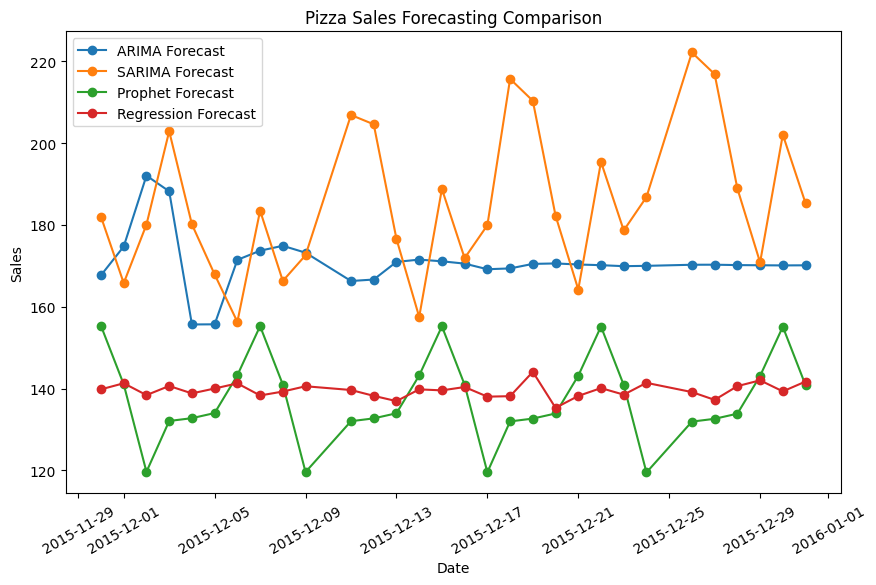

In [156]:
# Plot forecasts
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, forecast_arima, label='ARIMA Forecast', marker='o')
plt.plot(test_data.index[-30:], forecast_sarima, label='SARIMA Forecast', marker='o')
plt.plot(test_data.index[-30:], forecast_prophet['yhat'][-30:], label='Prophet Forecast', marker='o')
plt.plot(test_data.index[-30:], predicted_reg[:30], label='Regression Forecast', marker='o')
plt.title('Pizza Sales Forecasting Comparison')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=30)
plt.show()

In [158]:
# Sort ingredients by the total quantity needed and select the top 10
top_10_ingredients = ingredients_df.sort_values(by='total_quantity_needed', ascending=False).head(10)

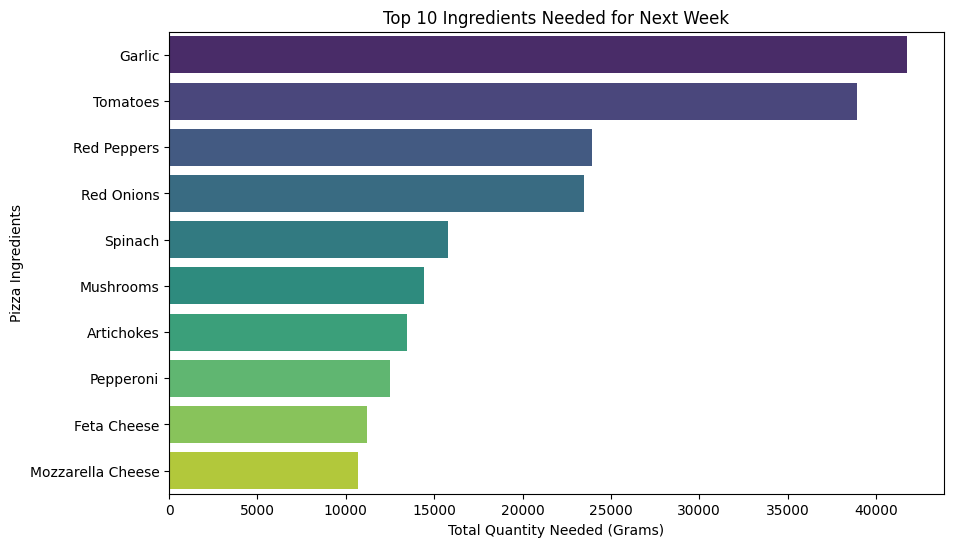

In [159]:
plt.figure(figsize=(10, 6))
sns.barplot(x='total_quantity_needed', y='pizza_ingredients',hue='pizza_ingredients' ,data=top_10_ingredients, palette='viridis')
plt.title('Top 10 Ingredients Needed for Next Week')
plt.xlabel('Total Quantity Needed (Grams)')
plt.ylabel('Pizza Ingredients')
plt.show()

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [ ]:
ingredients_df = pd.read_excel(r"C:\Users\Dell\Desktop\Pizza_ingredients.xlsx") # Load your dataset
ingredients_df

In [165]:
df = pd.read_excel(r"C:\Users\Dell\Desktop\Pizza_Sale.xlsx")
df

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01 00:00:00,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01 00:00:00,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01 00:00:00,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01 00:00:00,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01 00:00:00,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [166]:
# Convert 'order_date' to datetime, handling mixed formats
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce', dayfirst=True)

In [167]:
# Drop rows where 'order_date' conversion failed (NaT values)
df = df.dropna(subset=['order_date'])


In [168]:
# Drop rows with missing values (if any)
df.dropna(inplace=True)
df.dropna(inplace=True)

In [170]:
# Handle outliers by capping extreme values in quantity (e.g., 99th percentile)
q99 = df['quantity'].quantile(0.99)
df['quantity'] = np.where(df['quantity'] > q99, q99, df['quantity'])

In [171]:
# Feature Engineering
df['day_of_week'] = df['order_date'].dt.day_name()
df['month'] = df['order_date'].dt.month
df['year'] = df['order_date'].dt.year

In [172]:
# Ensure there are no duplicate 'order_date' values by aggregating
df = df.groupby('order_date').agg({'quantity': 'sum'}).reset_index()

In [173]:
# Set 'order_date' as the index for time series analysis
df.set_index('order_date', inplace=True)
df = df.asfreq('D')  # Ensure the data has a daily frequency (fill missing dates)
df['quantity'] = df['quantity'].ffill()  # Fill missing values by forward filling

In [175]:
data = df['quantity'][:-30]
data = df['quantity'][-30:]

In [176]:
# ARIMA Model 
arima_model = ARIMA(train_data, order=(5, 1, 0))
arima_fit = arima_model.fit()
forecast_arima = arima_fit.forecast(steps=30)
forecast_index = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is availab

In [177]:
#  SARIMA Model 
sarima_model = SARIMAX(train_data, order=(5, 1, 0), seasonal_order=(1, 1, 1, 7))
sarima_fit = sarima_model.fit()
forecast_sarima = sarima_fit.forecast(steps=30)


C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next

In [179]:
# Prophet Model
prophet_data = df.reset_index()[['order_date', 'quantity']].rename(columns={'order_date': 'ds', 'quantity': 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_data)
future = prophet_model.make_future_dataframe(periods=30)
forecast_prophet = prophet_model.predict(future)

13:32:39 - cmdstanpy - INFO - Chain [1] start processing
13:32:39 - cmdstanpy - INFO - Chain [1] done processing


In [180]:
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

In [181]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [186]:
# Regression Model
df['lag_1'] = df['quantity'].shift(1)
df['lag_2'] = df['quantity'].shift(2)
df.dropna(inplace=True)
train_reg = df[:-30]
test_reg = df[-30:]

In [187]:
x_train_reg = train_reg[['lag_1', 'lag_2']]
y_train_reg = train_reg['quantity']
x_test_reg = test_reg[['lag_1', 'lag_2']]
y_test_reg = test_reg['quantity']

In [188]:
# Performance Evaluation
mape_arima = mean_absolute_percentage_error(test_data, forecast_arima) * 100
mape_sarima = mean_absolute_percentage_error(test_data, forecast_sarima) * 100
mape_prophet = mean_absolute_percentage_error(test_data, forecast_prophet['yhat'][-30:]) * 100
mape_reg = mean_absolute_percentage_error(y_test_reg, predicted_reg) * 100

In [189]:
print(f"ARIMA MAPE: {mape_arima:.2f}%")
print(f"SARIMA MAPE: {mape_sarima:.2f}%")
print(f"Prophet MAPE: {mape_prophet:.2f}%")
print(f"Regression MAPE: {mape_reg:.2f}%")

ARIMA MAPE: 39.21%
SARIMA MAPE: 51.13%
Prophet MAPE: 18.89%
Regression MAPE: 17.73%


In [190]:
# Weekly Forecast
# Generating forecasts for the next 7 days
weekly_forecast_arima = arima_fit.forecast(steps=7).sum()
weekly_forecast_sarima = sarima_fit.forecast(steps=7).sum()
weekly_forecast_prophet = forecast_prophet['yhat'][-7:].sum()
weekly_forecast_reg = predicted_reg[-7:].sum()

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [191]:
print(f"Weekly Sales Prediction (ARIMA): {weekly_forecast_arima}")
print(f"Weekly Sales Prediction (SARIMA): {weekly_forecast_sarima}")
print(f"Weekly Sales Prediction (Prophet): {weekly_forecast_prophet}")
print(f"Weekly Sales Prediction (Regression): {weekly_forecast_reg}")

Weekly Sales Prediction (ARIMA): 1205.6182049056727
Weekly Sales Prediction (SARIMA): 1235.1835396689175
Weekly Sales Prediction (Prophet): 950.9859710887581
Weekly Sales Prediction (Regression): 981.3554582471598


In [192]:
# Monthly Forecast 
# Generating forecasts for the next 30 days
monthly_forecast_arima = arima_fit.forecast(steps=30).sum()
monthly_forecast_sarima = sarima_fit.forecast(steps=30).sum()
monthly_forecast_prophet = forecast_prophet['yhat'][-30:].sum()
monthly_forecast_reg = predicted_reg[-30:].sum()

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [193]:
print(f"Monthly Sales Prediction (ARIMA): {monthly_forecast_arima}")
print(f"Monthly Sales Prediction (SARIMA): {monthly_forecast_sarima}")
print(f"Monthly Sales Prediction (Prophet): {monthly_forecast_prophet}")
print(f"Monthly Sales Prediction (Regression): {monthly_forecast_reg}")

Monthly Sales Prediction (ARIMA): 5125.857211446418
Monthly Sales Prediction (SARIMA): 5563.768918888867
Monthly Sales Prediction (Prophet): 4101.30319050672
Monthly Sales Prediction (Regression): 4186.448302218616


In [194]:
# Ingredient Purchase Order Calculation 
total_pizzas_predicted = forecast_arima[:7].sum()  # Using ARIMA forecast for purchase order calculation

In [195]:
if 'quantity_per_pizza' not in ingredients_df.columns:
    ingredients_df['quantity_per_pizza'] = np.random.uniform(0.1, 1.0, size=len(ingredients_df))  # Random values

In [196]:
ingredients_df['total_quantity_needed'] = ingredients_df['quantity_per_pizza'] * total_pizzas_predicted
ingredients_df = ingredients_df.groupby('pizza_ingredients', as_index=False).agg({'total_quantity_needed': 'sum'})
ingredients_df = ingredients_df.sort_values('total_quantity_needed', ascending=False)

In [197]:
ingredients_df[['pizza_ingredients', 'total_quantity_needed']].to_csv('complete_purchase_order_next_week.csv', index=False)
print("Total Purchase Order for the Next Week (All Ingredients):")
print(ingredients_df[['pizza_ingredients', 'total_quantity_needed']])
ingredients_df.to_csv('Total_Ingredients_Neede',index=False, mode='w', header=True)

Total Purchase Order for the Next Week (All Ingredients):
     pizza_ingredients  total_quantity_needed
50    Provolone Cheese            1201.183477
39             Oregano            1185.091479
8    Barbecued Chicken            1166.168695
47       Plum Tomatoes            1158.114969
31       Green Peppers            1146.309621
..                 ...                    ...
55          Sliced Ham             172.830219
45         Pesto Sauce             168.154381
11   Brie Carre Cheese             167.717593
25              Garlic             159.490315
14  Caramelized Onions             131.143010

[64 rows x 2 columns]


In [198]:
# Weekly and Monthly Forecasts 
def plot_forecasts(title, arima, sarima, prophet, lstm, reg, forecast_index):
    plt.figure(figsize=(10, 6))
    plt.plot(forecast_index, arima, label='ARIMA', marker='o')
    plt.plot(forecast_index, sarima, label='SARIMA', marker='o')
    plt.plot(forecast_index, prophet, label='Prophet', marker='o')
    plt.plot(forecast_index, reg, label='Regression', marker='o')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Predicted Sales')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=30)
    plt.show()

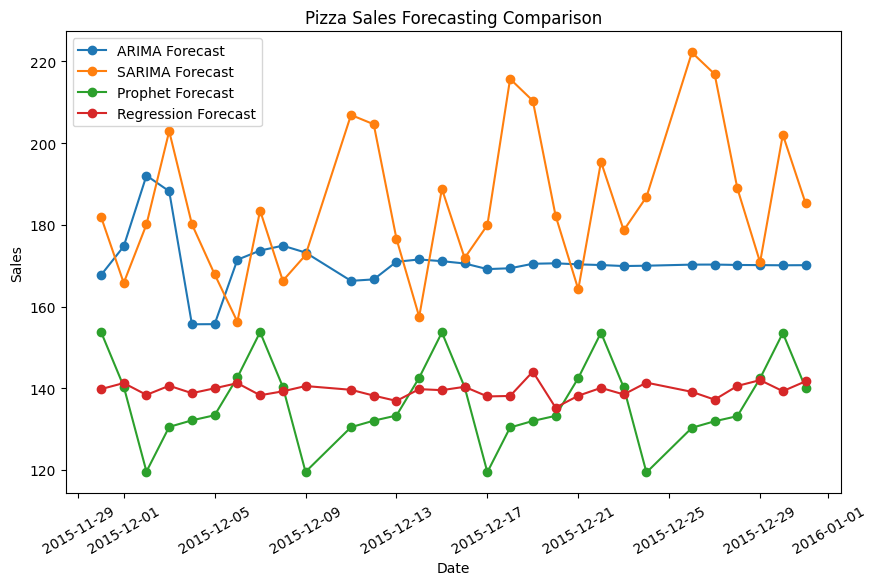

In [201]:
# Plot forecasts
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, forecast_arima, label='ARIMA Forecast', marker='o')
plt.plot(test_data.index[-30:], forecast_sarima, label='SARIMA Forecast', marker='o')
plt.plot(test_data.index[-30:], forecast_prophet['yhat'][-30:], label='Prophet Forecast', marker='o')
plt.plot(test_data.index[-30:], predicted_reg[:30], label='Regression Forecast', marker='o')
plt.title('Pizza Sales Forecasting Comparison')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=30)
plt.show()

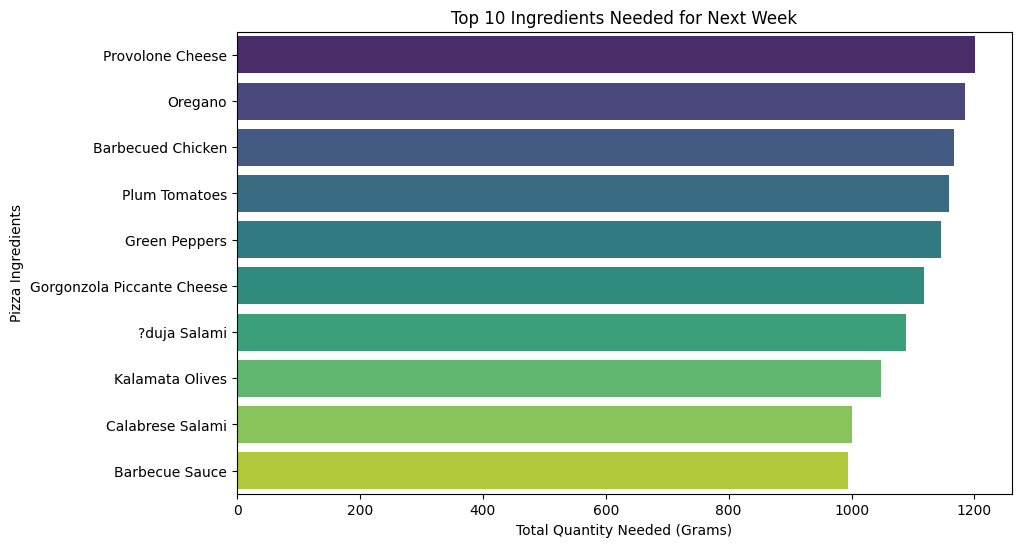

In [202]:
# Sort ingredients by the total quantity needed and select the top 10
top_10_ingredients = ingredients_df.sort_values(by='total_quantity_needed', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='total_quantity_needed', y='pizza_ingredients',hue='pizza_ingredients' ,data=top_10_ingredients, palette='viridis')
plt.title('Top 10 Ingredients Needed for Next Week')
plt.xlabel('Total Quantity Needed (Grams)')
plt.ylabel('Pizza Ingredients')
plt.show()